# Regresión Lineal - Gradiente descendiente estocástico en Python

### 1. Importamos las librerias / módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Creamos el conjunto de datos

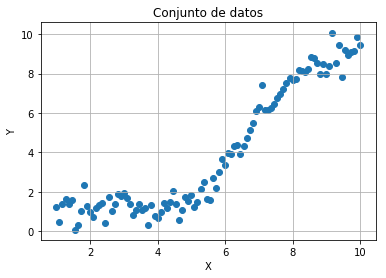

In [45]:
# data_x denomina a nuestros datos de entrada, data_y los de salida
data_x = np.linspace(1, 10, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

# Concatenamos nuestros conjunto de datos en un solo array
data_xy = np.concatenate((data_x, data_y), axis=1)
np.random.shuffle(data_xy)

# Agregamos nuestras etiquetas a los ejes y demás miscelaneos.
plt.scatter(data_x, data_y)

plt.xlabel('X'); plt.ylabel('Y'); plt.title('Conjunto de datos'); plt.grid('on')
plt.show()

### 3. Ejecución del algoritmo de gradiente descendiente estocástico

#### 3.1 Función de cálculo de gradiente de pérdida

In [46]:
'''
====================
Gradiente de Perdida
====================
Función que realiza el cálculo del gradiente de pérdida para un conjunto de datos x, y con una matrix de peso w.
'''
def compute_loss(x, y, w):
    y_estim = np.dot(x, w)
    grad_loss = 2 * np.dot(x.T, y_estim - y)
    return grad_loss

#### 3.2 Tamaño de paso, épocas y subconjunto _(batch)_

In [47]:
step_size = 1e-6
n_epoch = 1000 # Defina el número de épocas.

# Tamaño de los bloques o Batch
batchSize = 10
batchNum = int(len(data_xy) / batchSize)

#### 3.3 Metodo SGD

In [48]:
# Matrix de pesos.
print("- Inicializando la matrix de pesos de manera aleatoria -")
weights = np.random.random((1,1))
weights_2 = np.copy(weights)

print("Tamaño de la matrix de pesos: {}".format(weights.shape))
print("")
print("Metodo SGD")

# Ciclo para realizar las iteracciones
for epoch in range(n_epoch) :
    # Función de perdida (loss function)
    loss = np.power(np.dot(data_nx, weights) - data_ny, 2).mean()
    for batch in np.split(data_xy, batchNum) :
        grad_loss = compute_loss(batch[:,0][:, np.newaxis], batch[:,1][:, np.newaxis], weights)
        # Update weights using gradient.
        weights -= step_size * grad_loss

    if epoch % 100 == 0:
        print('Epoch: %d - Loss: %.4f' % (epoch, loss))
    
print("Peso obtenido por SGD: {}".format(weights))
print("")

- Inicializando la matrix de pesos de manera aleatoria -
Tamaño de la matrix de pesos: (1, 1)

Metodo SGD
Epoch: 0 - Loss: 7.3092
Epoch: 100 - Loss: 3.4078
Epoch: 200 - Loss: 2.5961
Epoch: 300 - Loss: 2.4463
Epoch: 400 - Loss: 2.4285
Epoch: 500 - Loss: 2.4321
Epoch: 600 - Loss: 2.4365
Epoch: 700 - Loss: 2.4393
Epoch: 800 - Loss: 2.4407
Epoch: 900 - Loss: 2.4414
Peso obtenido por SGD: [[ 0.79967199]]



#### 3.4 Método gradiente descendente

In [49]:
print("Metodo GD")

for epoch in range(1000) :
    estimate = data_x.dot(weights_2)
    # Función de perdida estimada (estimate loss function)
    loss = np.power((estimate - data_y), 2).mean()

    # Calculamos el gradiente de perdida (Gradient loss)
    grad_loss = compute_loss(data_x, data_y, weights_2)
    weights_2 -= step_size * grad_loss
    
    if epoch % 100 == 0 :
        print("Epoch: %d - Loss: %.4f" % (epoch, loss))
        
print("Peso obtenido por gradient descent: {}".format(weights_2))

Metodo GD
Epoch: 0 - Loss: 7.7070
Epoch: 100 - Loss: 3.5145
Epoch: 200 - Loss: 2.5705
Epoch: 300 - Loss: 2.3580
Epoch: 400 - Loss: 2.3101
Epoch: 500 - Loss: 2.2993
Epoch: 600 - Loss: 2.2969
Epoch: 700 - Loss: 2.2964
Epoch: 800 - Loss: 2.2963
Epoch: 900 - Loss: 2.2962
Peso obtenido por gradient descent: [[ 0.79967766]]


#### 3.5 Comparativa gráfica de ambos metodos

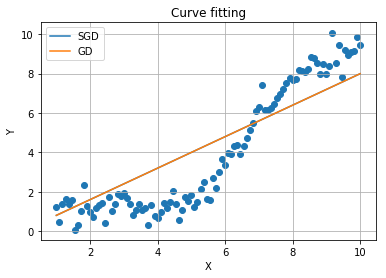

In [50]:
plt.scatter(data_x, data_y)
plt.plot(data_x, np.multiply(data_x, weights), label='SGD');
plt.plot(data_x, np.multiply(data_x, weights_2), label='GD');
plt.grid('On'); plt.title('Curve fitting'); plt.xlabel('X'); plt.ylabel('Y');
plt.legend()
plt.show()